In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import linear_model, preprocessing

In [2]:
le = preprocessing.LabelEncoder()
df = pd.read_csv("finalresults_SQLjoin.txt", delimiter = "\,")

c:\Users\AdamH\anaconda3\envs\mlenv\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [3]:
df.head(20)

,age,sexid,height,weight,diabetes,smokerid,drinkerid,famhistid,bmi,cholesterol,fpg_finalvisit
0,43,female,166.4,53.5,no,never smoker,never drinker,family history of diabetes,19.30,5.13,4.97
1,34,male,169.0,57.0,no,no info,no info,no family history of diabetes,20.00,4.61,5.50
2,32,female,157.0,51.0,no,no info,no info,no family history of diabetes,20.70,4.73,4.90
3,59,male,165.0,63.0,no,never smoker,never drinker,no family history of diabetes,23.10,4.50,5.50
4,30,female,163.5,48.5,no,no info,no info,no family history of diabetes,18.10,3.48,4.82
5,41,female,157.0,57.9,no,no info,no info,no family history of diabetes,23.50,3.70,5.00
6,51,female,170.0,61.8,no,no info,no info,no family history of diabetes,21.40,4.77,4.80
7,36,male,166.0,66.7,no,no info,no info,no family history of diabetes,24.20,4.75,5.32
8,31,male,167.0,61.5,no,no info,no info,no family history of diabetes,22.10,3.93,4.80
9,31,male,161.5,58.5,no,never smoker,never drinker,no family history of diabetes,22.40,4.48,5.10


In [4]:

#df.replace('no info', np.nan, regex=True)
df2 = df[df.smokerid != 'no info']
df = df2[df2.drinkerid != 'no info']
df.head(20)

,age,sexid,height,weight,diabetes,smokerid,drinkerid,famhistid,bmi,cholesterol,fpg_finalvisit
0,43,female,166.4,53.5,no,never smoker,never drinker,family history of diabetes,19.3,5.13,4.97
3,59,male,165.0,63.0,no,never smoker,never drinker,no family history of diabetes,23.1,4.50,5.50
9,31,male,161.5,58.5,no,never smoker,never drinker,no family history of diabetes,22.4,4.48,5.10
16,25,female,157.0,50.0,no,never smoker,never drinker,no family history of diabetes,20.3,4.05,4.85
19,66,male,156.0,60.5,no,current smoker,never drinker,no family history of diabetes,24.9,4.67,6.31
21,47,male,179.5,86.0,no,never smoker,never drinker,no family history of diabetes,26.7,6.34,5.23
25,49,male,175.0,93.0,no,current smoker,former drinker,no family history of diabetes,30.4,3.16,5.60
27,30,male,167.0,69.0,no,never smoker,former drinker,no family history of diabetes,24.7,6.04,6.02
30,31,female,166.5,52.5,no,never smoker,never drinker,no family history of diabetes,18.9,4.20,4.30
42,51,male,169.7,77.3,no,current smoker,never drinker,no family history of diabetes,26.8,5.17,5.60


In [5]:
df['diabetes'] = df['diabetes'].map({'yes':1,'no':0})
df.head(20)

,age,sexid,height,weight,diabetes,smokerid,drinkerid,famhistid,bmi,cholesterol,fpg_finalvisit
0,43,female,166.4,53.5,0,never smoker,never drinker,family history of diabetes,19.3,5.13,4.97
3,59,male,165.0,63.0,0,never smoker,never drinker,no family history of diabetes,23.1,4.50,5.50
9,31,male,161.5,58.5,0,never smoker,never drinker,no family history of diabetes,22.4,4.48,5.10
16,25,female,157.0,50.0,0,never smoker,never drinker,no family history of diabetes,20.3,4.05,4.85
19,66,male,156.0,60.5,0,current smoker,never drinker,no family history of diabetes,24.9,4.67,6.31
21,47,male,179.5,86.0,0,never smoker,never drinker,no family history of diabetes,26.7,6.34,5.23
25,49,male,175.0,93.0,0,current smoker,former drinker,no family history of diabetes,30.4,3.16,5.60
27,30,male,167.0,69.0,0,never smoker,former drinker,no family history of diabetes,24.7,6.04,6.02
30,31,female,166.5,52.5,0,never smoker,never drinker,no family history of diabetes,18.9,4.20,4.30
42,51,male,169.7,77.3,0,current smoker,never drinker,no family history of diabetes,26.8,5.17,5.60


In [6]:
cat = df.dtypes[df.dtypes == "object"].index.tolist()
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(cat)
encode_df.head()


,sexid_female,sexid_male,smokerid_current smoker,smokerid_former smoker,smokerid_never smoker,drinkerid_current drinker,drinkerid_former drinker,drinkerid_never drinker,famhistid_family history of diabetes,famhistid_no family history of diabetes
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [7]:
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(cat,1)
df = df.dropna()
df.head()

c:\Users\AdamH\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,age,height,weight,diabetes,bmi,cholesterol,fpg_finalvisit,sexid_female,sexid_male,smokerid_current smoker,smokerid_former smoker,smokerid_never smoker,drinkerid_current drinker,drinkerid_former drinker,drinkerid_never drinker,famhistid_family history of diabetes,famhistid_no family history of diabetes
0,43,166.4,53.5,0,19.3,5.13,4.97,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,59,165.0,63.0,0,23.1,4.50,5.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,31,161.5,58.5,0,22.4,4.48,5.10,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
16,25,157.0,50.0,0,20.3,4.05,4.85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
19,66,156.0,60.5,0,24.9,4.67,6.31,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [8]:
X = df.drop("diabetes",axis = 1)
Y = df['diabetes']
X.describe().T
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size = 0.1)

In [16]:
from sklearn.metrics import f1_score

f1s = []
k = list(range(1, 40))
# Calculating f1 score for K values between 1 and 40
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))


Text(0, 0.5, 'F1 Score')

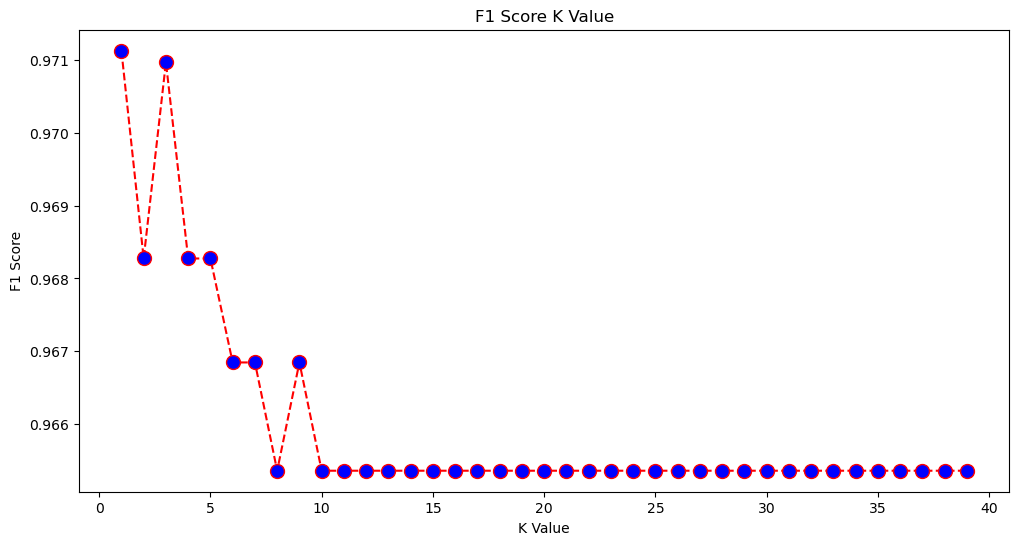

In [21]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [9]:
model =  KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

In [10]:
model.fit(x_train, y_train)

acc = model.score(x_test, y_test)
print(acc)

0.9810860280658938


In [11]:
y_pred_test=model.predict(x_test)

con_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion matrix: \n",con_matrix)

accur_score=accuracy_score(y_test,y_pred_test)
print("accuracy_score: \n",accur_score)

report=classification_report(y_test,y_pred_test)
print("classification_report: \n",report)

Confusion matrix: 
 [[1607    0]
 [  31    1]]
accuracy_score: 
 0.9810860280658938
classification_report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1607
           1       1.00      0.03      0.06        32

    accuracy                           0.98      1639
   macro avg       0.99      0.52      0.53      1639
weighted avg       0.98      0.98      0.97      1639

